#**Analisis Sentimen Pada Aplikasi Gojek**#

In [29]:
import pandas as pd
import re
import string
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import csv
import requests
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from io import StringIO
!pip install Sastrawi
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import nltk # Import nltk library
from nltk.tokenize import word_tokenize # Import word_tokenize
from nltk.corpus import stopwords # Import stopwords
from tqdm.auto import tqdm # Import tqdm
tqdm.pandas()
from wordcloud import WordCloud
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.svm import LinearSVC

In [30]:
url = 'gojek_reviews.csv'
df = pd.read_csv(url)

# Menampilkan dataframe sebagai tabel
df

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,be20eda7-0d90-4384-94b0-17bdc03a23d4,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,good,5,0,5.18.2,2025-05-16 03:03:36,NaN,NaN,5.18.2
1,c66ad64f-15ac-43ce-97cf-cf5eef90ac0f,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"mana bos ku,yang kenapa gojek saya tidak bisa ...",5,0,5.18.2,2025-05-16 02:48:05,NaN,NaN,5.18.2
2,fbe12b87-bf87-48c4-86cc-0eb32045c027,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,good,5,0,5.18.2,2025-05-16 02:43:21,NaN,NaN,5.18.2
3,a340b5ed-8059-49dd-99ce-2413324f71aa,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Tepat waktu,sesuai aplikasi",5,0,5.18.2,2025-05-16 02:42:20,NaN,NaN,5.18.2
4,4a159195-b4cd-411a-ab18-154105ae3213,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,mengganggu iklan,1,0,4.14.2,2025-05-16 02:38:08,"Hai Kak Subur, mohon maaf atas ketidaknyamanan...",2025-05-16 06:55:28,4.14.2
...,...,...,...,...,...,...,...,...,...,...,...
9995,05cffb29-05bf-41be-a38f-58bcf1c2c2b9,imam firmansyah,https://play-lh.googleusercontent.com/a-/ALV-U...,oke,5,0,5.4.1,2025-03-28 16:53:35,NaN,NaN,5.4.1
9996,916f9e69-c591-4ce6-9c3a-439c6868e70c,widya asri,https://play-lh.googleusercontent.com/a-/ALV-U...,berkali2 pesan gk bsa sampek resto nya tutup t...,1,0,5.14.2,2025-03-28 16:52:56,"Hai Kak Widya, mohon maaf atas ketidaknyamanan...",2025-03-28 23:03:52,5.14.2
9997,67e737eb-0d51-49d1-8d51-46218c8a75f0,Genesya Tian,https://play-lh.googleusercontent.com/a/ACg8oc...,gofood nya mhl mhl,1,0,5.14.2,2025-03-28 16:51:53,"Mohon maaf atas ketidaknyamanannya, Kak Genesy...",2025-03-28 23:01:51,5.14.2
9998,1ef66d2f-c128-4722-8386-b507891453f3,5_Arfa adnandika Ramadhan,https://play-lh.googleusercontent.com/a-/ALV-U...,gopay saya hilanggg gimana inii,5,0,NaN,2025-03-28 16:50:06,NaN,NaN,NaN


In [31]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   reviewId              10000 non-null  object
 1   userName              10000 non-null  object
 2   userImage             10000 non-null  object
 3   content               10000 non-null  object
 4   score                 10000 non-null  int64 
 5   thumbsUpCount         10000 non-null  int64 
 6   reviewCreatedVersion  7814 non-null   object
 7   at                    10000 non-null  object
 8   replyContent          3091 non-null   object
 9   repliedAt             3091 non-null   object
 10  appVersion            7814 non-null   object
dtypes: int64(2), object(9)
memory usage: 859.5+ KB
None


In [32]:
# Menghitung dan menampilkan nilai NaN
missing_data = df.isna().sum()  # Menampilkan jumlah NaN per kolom
print(missing_data)

reviewId                   0
userName                   0
userImage                  0
content                    0
score                      0
thumbsUpCount              0
reviewCreatedVersion    2186
at                         0
replyContent            6909
repliedAt               6909
appVersion              2186
dtype: int64


In [33]:
# Hapus kolom pada DataFrame
df = df.drop(columns=['reviewId', 'userImage', 'thumbsUpCount', 'reviewCreatedVersion', 'replyContent',
                      'repliedAt', 'appVersion'])
print(df.columns)

Index(['userName', 'content', 'score', 'at'], dtype='object')


In [34]:
clean_df = df

In [35]:
# Menghapus baris duplikat dari DataFrame clean_df
clean_df = clean_df.drop_duplicates()

# Menghitung jumlah baris dan kolom dalam DataFrame clean_df setelah menghapus duplikat
jumlah_ulasan_setelah_hapus_duplikat, jumlah_kolom_setelah_hapus_duplikat = clean_df.shape

In [36]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   userName  10000 non-null  object
 1   content   10000 non-null  object
 2   score     10000 non-null  int64 
 3   at        10000 non-null  object
dtypes: int64(1), object(3)
memory usage: 312.6+ KB


##Preprocessing Text##

In [37]:
factory = StemmerFactory()
stemmer = factory.create_stemmer()

import nltk
try:
      nltk.download('stopwords', quiet=True) # Download stopwords
except LookupError:
    nltk.data.find('corpora/stopwords')
except nltk.downloader.DownloadError:
    print("Downloading stopwords...")
    nltk.download('stopwords')
except LookupError:
    print("Downloading stopwords...")
    nltk.download('stopwords')

# Update stopwords dengan tambahan kata
stop_words = set(stopwords.words('indonesian'))

def cleaningText(text):
    text = re.sub(r'@\w+', '', text)  # hapus mention
    text = re.sub(r'#\w+', '', text)  # hapus hashtag
    text = re.sub(r'RT\s+', '', text)  # hapus RT
    text = re.sub(r'http\S+', '', text)  # hapus link
    text = text.replace('\n', ' ')  # ganti newline dengan spasi
    text = text.strip()  # hapus spasi di awal/akhir
    return text

def casefoldingText(text):
    return text.lower()

def tokenizingText(text):
    return text.split()

def filteringText(tokens):
    return [word for word in tokens if word not in stop_words]

def stemmingText(tokens):
    return [stemmer.stem(word) for word in tokens]

def toSentence(words):
    return ' '.join(words)

In [38]:
# Terapkan kamus slangwords ke kolom 'content_cleaned'

# Kamus slang words khusus Gojek
slangwords = {
    "abis": "habis", "aj": "saja", "aja": "saja", "bgt": "banget",
    "bikin": "membuat", "blm": "belum", "btw": "ngomong-ngomong", "cpt": "cepat", "dah": "sudah",
    "dg": "dengan", "dr": "dari", "ga": "tidak", "gak": "tidak", "gt": "gitu", "jd": "jadi",
    "jg": "juga", "kalo": "kalau", "kenapa": "mengapa", "krn": "karena", "ksh": "kasih", "lg": "lagi",
    "lgi": "lagi", "lbh": "lebih", "lho": "loh", "lo": "kamu", "makasih": "terima kasih", "maksudny": "maksudnya",
    "msh": "masih", "nggak": "tidak", "ny": "nya", "ok": "oke", "pake": "pakai", "pdhl": "padahal",
    "plis": "tolong", "pke": "pakai", "ribet": "rumit", "sblm": "sebelum", "sm": "sama", "smg": "semoga",
    "sya": "saya", "tdk": "tidak", "tp": "tapi", "trs": "terus", "udh": "sudah", "utk": "untuk",
    "yg": "yang", "mhl": "mahal", "sdh": "sudah", "bnyk": "banyak"
}
def fix_slangwords(text):
    words = text.split()
    fixed_words = []

    for word in words:
        lower_word = word.lower()
        fixed_word = slangwords.get(lower_word, word)
        fixed_words.append(fixed_word)

    fixed_text = ' '.join(fixed_words)
    return fixed_text

In [39]:
# Membersihkan teks dan menyimpannya di kolom 'text_clean'
df['text_clean'] = df['content'].apply(cleaningText)

# Mengubah huruf dalam teks menjadi huruf kecil dan menyimpannya di 'text_casefoldingText'
df['text_casefoldingText'] = df['text_clean'].apply(casefoldingText)

# Mengganti kata-kata slang dengan kata-kata standar dan menyimpannya di 'text_slangwords'
df['text_slangwords'] = df['text_casefoldingText'].apply(fix_slangwords)

# Memecah teks menjadi token (kata-kata) dan menyimpannya di 'text_tokenizingText'
df['text_tokenizingText'] = df['text_slangwords'].apply(tokenizingText)

# Menghapus kata-kata stop (kata-kata umum) dan menyimpannya di 'text_stopword'
df['text_stopword'] = df['text_tokenizingText'].apply(filteringText)

# Menggabungkan token-token menjadi kalimat dan menyimpannya di 'text_akhir'
df['text_akhir'] = df['text_stopword'].apply(toSentence)

In [40]:
df

,userName,content,score,at,text_clean,text_casefoldingText,text_slangwords,text_tokenizingText,text_stopword,text_akhir
0,Pengguna Google,good,5,2025-05-16 03:03:36,good,good,good,[good],[good],good
1,Pengguna Google,"mana bos ku,yang kenapa gojek saya tidak bisa ...",5,2025-05-16 02:48:05,"mana bos ku,yang kenapa gojek saya tidak bisa ...","mana bos ku,yang kenapa gojek saya tidak bisa ...","mana bos ku,yang mengapa gojek saya tidak bisa...","[mana, bos, ku,yang, mengapa, gojek, saya, tid...","[bos, ku,yang, gojek, login]","bos ku,yang gojek login"
2,Pengguna Google,good,5,2025-05-16 02:43:21,good,good,good,[good],[good],good
3,Pengguna Google,"Tepat waktu,sesuai aplikasi",5,2025-05-16 02:42:20,"Tepat waktu,sesuai aplikasi","tepat waktu,sesuai aplikasi","tepat waktu,sesuai aplikasi","[tepat, waktu,sesuai, aplikasi]","[waktu,sesuai, aplikasi]","waktu,sesuai aplikasi"
4,Pengguna Google,mengganggu iklan,1,2025-05-16 02:38:08,mengganggu iklan,mengganggu iklan,mengganggu iklan,"[mengganggu, iklan]","[mengganggu, iklan]",mengganggu iklan
...,...,...,...,...,...,...,...,...,...,...
9995,imam firmansyah,oke,5,2025-03-28 16:53:35,oke,oke,oke,[oke],[oke],oke
9996,widya asri,berkali2 pesan gk bsa sampek resto nya tutup t...,1,2025-03-28 16:52:56,berkali2 pesan gk bsa sampek resto nya tutup t...,berkali2 pesan gk bsa sampek resto nya tutup t...,berkali2 pesan gk bsa sampek resto nya tutup t...,"[berkali2, pesan, gk, bsa, sampek, resto, nya,...","[berkali2, pesan, gk, bsa, sampek, resto, nya,...",berkali2 pesan gk bsa sampek resto nya tutup g...
9997,Genesya Tian,gofood nya mhl mhl,1,2025-03-28 16:51:53,gofood nya mhl mhl,gofood nya mhl mhl,gofood nya mahal mahal,"[gofood, nya, mahal, mahal]","[gofood, nya, mahal, mahal]",gofood nya mahal mahal
9998,5_Arfa adnandika Ramadhan,gopay saya hilanggg gimana inii,5,2025-03-28 16:50:06,gopay saya hilanggg gimana inii,gopay saya hilanggg gimana inii,gopay saya hilanggg gimana inii,"[gopay, saya, hilanggg, gimana, inii]","[gopay, hilanggg, gimana, inii]",gopay hilanggg gimana inii


##Pelabelan##

In [41]:
def label_sentiment(score):
    if score >= 4:
        return 'positif'
    elif score == 3:
        return 'netral'
    else:
        return 'negatif'

df['label'] = df['score'].apply(label_sentiment)

In [42]:
print(df['label'].value_counts())

label
positif    6794
negatif    2833
netral      373
Name: count, dtype: int64


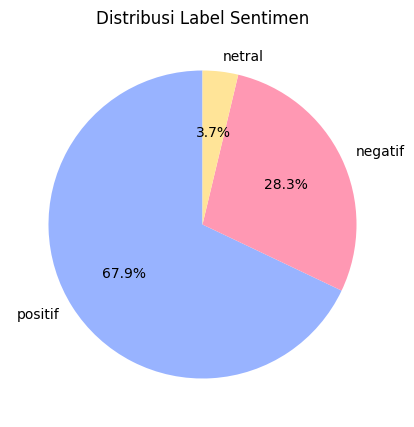

In [43]:
# Hitung jumlah label pada setiap kategori
label_counts = df['label'].value_counts()

# Buat pie chart
plt.figure(figsize=(5, 5))
plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%', startangle=90, colors=['#98b3ff', '#ff98b3', '#ffe498'])
plt.title('Distribusi Label Sentimen')
plt.show()

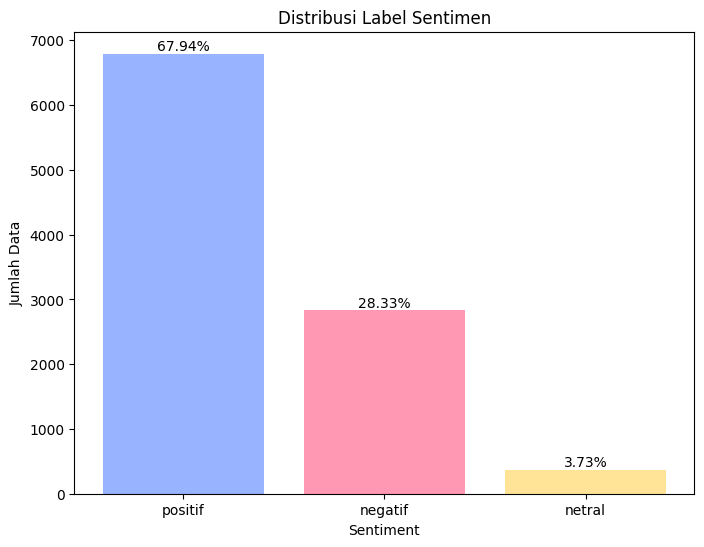

In [44]:
# Hitung jumlah label pada setiap kategori
label_counts = df['label'].value_counts()

# Hitung persentase untuk setiap kategori
label_percentages = label_counts / label_counts.sum() * 100

# Buat bar chart dan simpan dalam variabel `bars`
plt.figure(figsize=(8, 6))
bars = plt.bar(label_counts.index, label_counts.values, color=['#98b3ff', '#ff98b3', '#ffe498'])

# Tambahkan persentase di atas setiap bar
for bar, percentage in zip(bars, label_percentages):
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height(),
        f'{percentage:.2f}%',
        ha='center',
        va='bottom'
    )

plt.xlabel('Sentiment')
plt.ylabel('Jumlah Data')
plt.title('Distribusi Label Sentimen')
plt.show()

##WordCloud Positive##

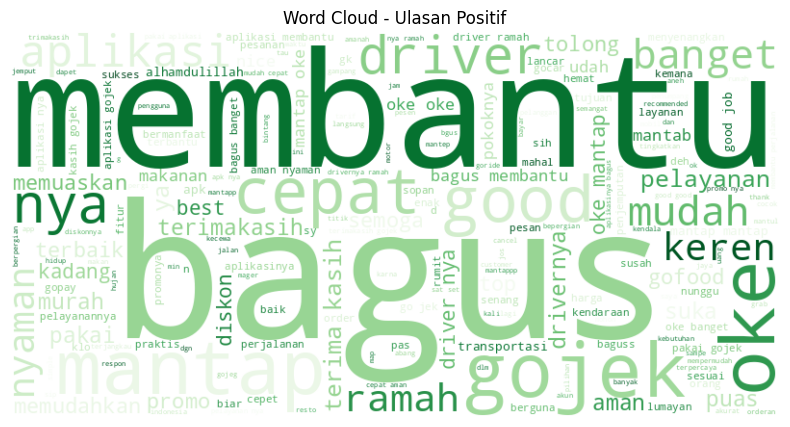

In [45]:
# Gabungkan semua teks dari label positif
positive_text = ' '.join(df[df['label'] == 'positif']['text_akhir'])

# Buat WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='Greens').generate(positive_text)

# Tampilkan WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud - Ulasan Positif')
plt.show()

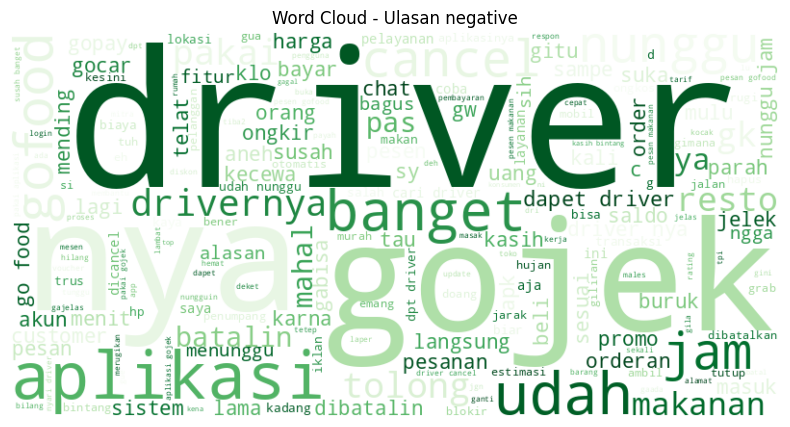

In [46]:
# Gabungkan semua teks dari label negative
negative_text = ' '.join(df[df['label'] == 'negatif']['text_akhir'])

# Buat WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='Greens').generate(negative_text)

# Tampilkan WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud - Ulasan negative')
plt.show()

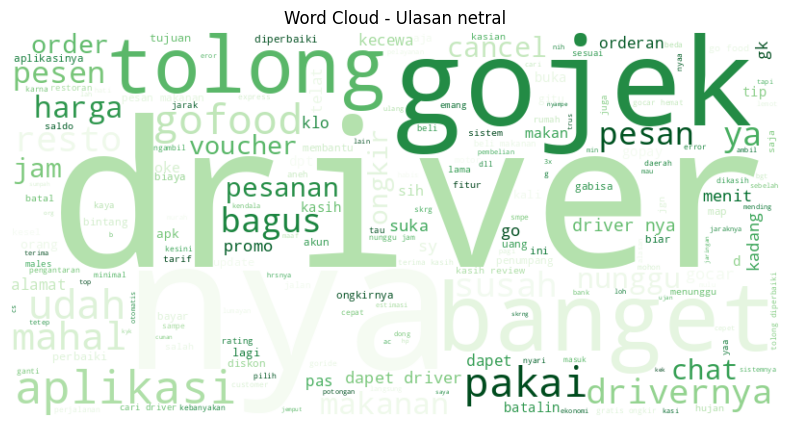

In [47]:
# Gabungkan semua teks dari label netral
netral_text = ' '.join(df[df['label'] == 'netral']['text_akhir'])

# Buat WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='Greens').generate(netral_text)

# Tampilkan WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud - Ulasan netral')
plt.show()

##Data Splitting dan Ekstraksi Fitur dengan TF-IDF##

In [48]:
# Pisahkan fitur dan label
X = df['text_akhir']    # teks yang sudah siap diproses (string)
y = df['label']

tfidf = TfidfVectorizer(max_features=1000, min_df=2, max_df=0.95)
X_tfidf = tfidf.fit_transform(df['text_akhir'])

# Konversi ke DataFrame untuk visualisasi jika diperlukan
features_df = pd.DataFrame(X_tfidf.toarray(), columns=tfidf.get_feature_names_out())

# Menampilkan DataFrame fitur (opsional)
print(features_df.head())

# Split data menjadi train dan test (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

print(f"Data train: {X_train.shape}, Data test: {X_test.shape}")

    00  000   10  100   11   12   15   16  1jam   20  ...  wajar     waktu  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0  0.000000   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0  0.000000   
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0  0.000000   
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0  0.711249   
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0  0.000000   

   wilayah  wkwk  woy   xl   ya  yaa  yaaa  yah  
0      0.0   0.0  0.0  0.0  0.0  0.0   0.0  0.0  
1      0.0   0.0  0.0  0.0  0.0  0.0   0.0  0.0  
2      0.0   0.0  0.0  0.0  0.0  0.0   0.0  0.0  
3      0.0   0.0  0.0  0.0  0.0  0.0   0.0  0.0  
4      0.0   0.0  0.0  0.0  0.0  0.0   0.0  0.0  

[5 rows x 1000 columns]
Data train: (8000, 1000), Data test: (2000, 1000)


##Modeling##

**Logistic Regression**

In [49]:
# Membuat objek model Logistic Regression
logistic_regression = LogisticRegression()

# Melatih model Logistic Regression pada data pelatihan
logistic_regression.fit(X_train.toarray(), y_train)

# Prediksi sentimen pada data pelatihan dan data uji
y_pred_train_lr = logistic_regression.predict(X_train.toarray())
y_pred_test_lr = logistic_regression.predict(X_test.toarray())

# Evaluasi akurasi model Logistic Regression pada data pelatihan
accuracy_train_lr = accuracy_score(y_pred_train_lr, y_train)

# Evaluasi akurasi model Logistic Regression pada data uji
accuracy_test_lr = accuracy_score(y_pred_test_lr, y_test)

# Menampilkan akurasi
print('Logistic Regression - accuracy_train:', accuracy_train_lr)
print('Logistic Regression - accuracy_test:', accuracy_test_lr)

# Evaluasi performa model
print('Classification Report:')
print(classification_report(y_test, y_pred_test_lr))

print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred_test_lr))

Logistic Regression - accuracy_train: 0.911375
Logistic Regression - accuracy_test: 0.882
Classification Report:
              precision    recall  f1-score   support

     negatif       0.81      0.82      0.81       567
      netral       0.00      0.00      0.00        74
     positif       0.91      0.96      0.93      1359

    accuracy                           0.88      2000
   macro avg       0.57      0.59      0.58      2000
weighted avg       0.85      0.88      0.87      2000

Confusion Matrix:
[[ 466    1  100]
 [  51    0   23]
 [  61    0 1298]]


**Naive Bayes**

In [50]:
# Membuat objek model Naive Bayes (Bernoulli Naive Bayes)
naive_bayes = BernoulliNB()

# Melatih model Naive Bayes pada data pelatihan
naive_bayes.fit(X_train.toarray(), y_train)

# Prediksi sentimen pada data pelatihan dan data uji
y_pred_train_nb = naive_bayes.predict(X_train.toarray())
y_pred_test_nb = naive_bayes.predict(X_test.toarray())

# Evaluasi akurasi model Naive Bayes
accuracy_train_nb = accuracy_score(y_pred_train_nb, y_train)
accuracy_test_nb = accuracy_score(y_pred_test_nb, y_test)

# Menampilkan akurasi
print('Naive Bayes - accuracy_train:', accuracy_train_nb)
print('Naive Bayes - accuracy_test:', accuracy_test_nb)

# Evaluasi performa model
print('Classification Report:')
print(classification_report(y_test, y_pred_test_lr))

print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred_test_lr))

Naive Bayes - accuracy_train: 0.862875
Naive Bayes - accuracy_test: 0.846
Classification Report:
              precision    recall  f1-score   support

     negatif       0.81      0.82      0.81       567
      netral       0.00      0.00      0.00        74
     positif       0.91      0.96      0.93      1359

    accuracy                           0.88      2000
   macro avg       0.57      0.59      0.58      2000
weighted avg       0.85      0.88      0.87      2000

Confusion Matrix:
[[ 466    1  100]
 [  51    0   23]
 [  61    0 1298]]


**Random Forest**

In [51]:
# Membuat objek model Random Forest
random_forest = RandomForestClassifier()

# Melatih model Random Forest pada data pelatihan
random_forest.fit(X_train.toarray(), y_train)

# Prediksi sentimen pada data pelatihan dan data uji
y_pred_train_rf = random_forest.predict(X_train.toarray())
y_pred_test_rf = random_forest.predict(X_test.toarray())

# Evaluasi akurasi model Random Forest
accuracy_train_rf = accuracy_score(y_pred_train_rf, y_train)
accuracy_test_rf = accuracy_score(y_pred_test_rf, y_test)

rf_model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
rf_model.fit(X_train.toarray(), y_train)
y_pred = rf_model.predict(X_test.toarray())

# Menampilkan akurasi
print('Random Forest - accuracy_train:', accuracy_train_rf)
print('Random Forest - accuracy_test:', accuracy_test_rf)

# Evaluasi performa model
print('Classification Report:')
print(classification_report(y_test, y_pred_test_lr))

print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred_test_lr))

Random Forest - accuracy_train: 0.9835
Random Forest - accuracy_test: 0.8805
Classification Report:
              precision    recall  f1-score   support

     negatif       0.81      0.82      0.81       567
      netral       0.00      0.00      0.00        74
     positif       0.91      0.96      0.93      1359

    accuracy                           0.88      2000
   macro avg       0.57      0.59      0.58      2000
weighted avg       0.85      0.88      0.87      2000

Confusion Matrix:
[[ 466    1  100]
 [  51    0   23]
 [  61    0 1298]]


In [52]:
# Fungsi evaluasi lengkap
def evaluate_model(model, X_test, y_test, label_names=["negatif", "netral", "positif"], title="Model"):
    y_pred = model.predict(X_test)

    print(f"\n=== Evaluasi Model: {title} ===")
    print(classification_report(y_test, y_pred, target_names=label_names))

    cm = confusion_matrix(y_test, y_pred)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d',
                xticklabels=label_names,
                yticklabels=label_names,
                cmap='Blues')
    plt.xlabel("Prediksi")
    plt.ylabel("Aktual")
    plt.title(f"Confusion Matrix - {title}")
    plt.tight_layout()
    plt.show()


=== Evaluasi Model: Logistic Regression ===
              precision    recall  f1-score   support

     negatif       0.81      0.82      0.81       567
      netral       0.00      0.00      0.00        74
     positif       0.91      0.96      0.93      1359

    accuracy                           0.88      2000
   macro avg       0.57      0.59      0.58      2000
weighted avg       0.85      0.88      0.87      2000



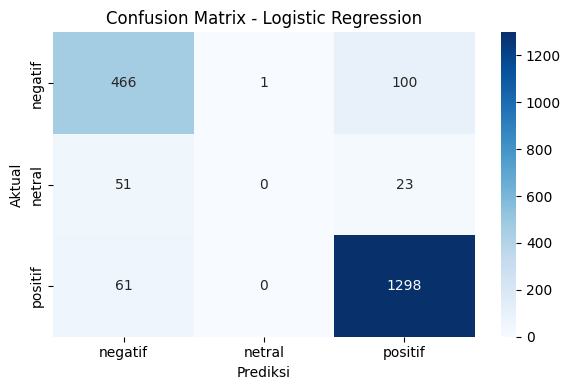


=== Evaluasi Model: Naive Bayes ===
              precision    recall  f1-score   support

     negatif       0.82      0.70      0.76       567
      netral       0.05      0.04      0.04        74
     positif       0.89      0.95      0.92      1359

    accuracy                           0.85      2000
   macro avg       0.59      0.56      0.57      2000
weighted avg       0.84      0.85      0.84      2000



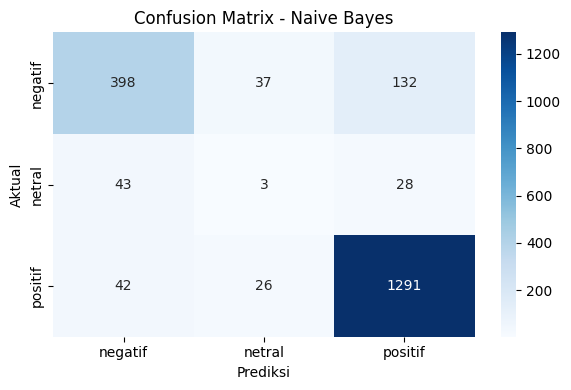


=== Evaluasi Model: Random Forest ===
              precision    recall  f1-score   support

     negatif       0.79      0.85      0.82       567
      netral       0.50      0.01      0.03        74
     positif       0.92      0.94      0.93      1359

    accuracy                           0.88      2000
   macro avg       0.74      0.60      0.59      2000
weighted avg       0.87      0.88      0.87      2000



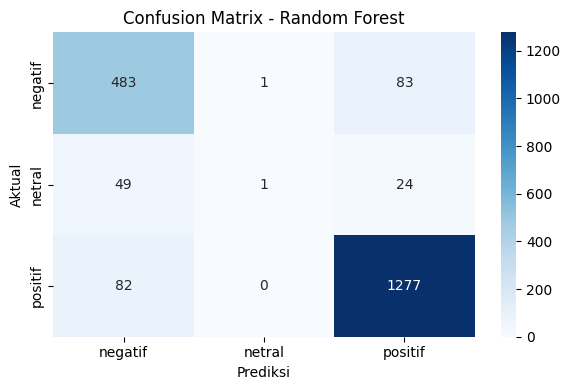

In [53]:
evaluate_model(model=logistic_regression, X_test=X_test, y_test=y_test, title="Logistic Regression")
evaluate_model(model=naive_bayes, X_test=X_test, y_test=y_test, title="Naive Bayes")
evaluate_model(model=random_forest, X_test=X_test, y_test=y_test, title="Random Forest")

**Pelatihan: SVM,    Ekstraksi Fitur: TF-IDF,    Pembagian Data: 80/20**

In [54]:
# Inisialisasi model SVM
svm_model = LinearSVC()

# Latih model
svm_model.fit(X_train, y_train)

# Prediksi
y_pred_svm = svm_model.predict(X_test)

# Evaluasi akurasi
accuracy_train_svm = svm_model.score(X_train, y_train)
accuracy_test_svm = svm_model.score(X_test, y_test)

# Cetak hasil
print(f"SVM - accuracy_train: {accuracy_train_svm:.6f}")
print(f"SVM - accuracy_test: {accuracy_test_svm:.6f}")

print("Classification Report:")
print(classification_report(y_test, y_pred_svm))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_svm))

SVM - accuracy_train: 0.923375
SVM - accuracy_test: 0.874500
Classification Report:
              precision    recall  f1-score   support

     negatif       0.80      0.80      0.80       567
      netral       0.08      0.01      0.02        74
     positif       0.91      0.95      0.93      1359

    accuracy                           0.87      2000
   macro avg       0.60      0.59      0.59      2000
weighted avg       0.85      0.87      0.86      2000

Confusion Matrix:
[[ 454    5  108]
 [  51    1   22]
 [  59    6 1294]]
